# Data Science & Business Analytics Intern

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import seaborn as sns
import warnings


In [ ]:
# Reading dataset
data=pd.read_csv('terro.csv',encoding=('ISO-8859-1'))


<ipython-input-5-4f53ebde45f2>:2: DtypeWarning: Columns (4,76,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('terro.csv',encoding=('ISO-8859-1'))


In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.columns
data.shape

(7316, 135)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 7.5+ MB


In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in data.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# Cleaning the data

In [ ]:
 data = data[["iyear", "imonth", "iday","country_txt","region_txt","provstate","city","latitude", "longitude","location","summary",
        "attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [ ]:
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
data.rename(columns={"iyear":"Year", "imonth":"Month", "iday":"Day","country_txt":"Country","region_txt":"Region",
                     "provstate":"Province/State","city":"City","latitude":"Latitude", "longitude":"Longitute",
                     "location":"Location","summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                     "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Killed",
                     "nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

<ipython-input-13-a388b4e9e2f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"iyear":"Year", "imonth":"Month", "iday":"Day","country_txt":"Country","region_txt":"Region",


In [ ]:
data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitute,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            7316 non-null   int64  
 1   Month           7316 non-null   int64  
 2   Day             7316 non-null   int64  
 3   Country         7316 non-null   object 
 4   Region          7316 non-null   object 
 5   Province/State  7290 non-null   object 
 6   City            7316 non-null   object 
 7   Latitude        7133 non-null   float64
 8   Longitute       7133 non-null   float64
 9   Location        543 non-null    object 
 10  Summary         855 non-null    object 
 11  Attack Type     7316 non-null   object 
 12  Target Type     7316 non-null   object 
 13  Group Name      7315 non-null   object 
 14  Motive          591 non-null    object 
 15  Weapon Type     7315 non-null   object 
 16  Killed          6507 non-null   float64
 17  Wounded         5273 non-null   f

In [ ]:
data.shape

(7316, 19)

In [ ]:
data.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
Province/State      26
City                 0
Latitude           183
Longitute          183
Location          6773
Summary           6461
Attack Type          0
Target Type          0
Group Name           1
Motive            6725
Weapon Type          1
Killed             809
Wounded           2043
Add Notes         6690
dtype: int64

In [ ]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualty"]=data["Killed"]+data["Wounded"] 

In [ ]:
data.describe()

,Year,Month,Day,Latitude,Longitute,Killed,Wounded,Casualty
count,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,7316.000000,7316.000000,7316.000000
mean,1975.003417,6.523237,15.129579,34.842112,-22.783191,0.699016,0.764899,1.463915
std,2.675243,3.477868,9.053688,22.248928,52.465516,5.912916,6.682300,9.512459
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1973.000000,3.000000,7.000000,33.888523,-73.931351,0.000000,0.000000,0.000000
50%,1976.000000,6.000000,15.000000,41.106178,-5.956210,0.000000,0.000000,0.000000
75%,1977.000000,10.000000,23.000000,48.856644,9.407588,1.000000,0.000000,1.000000
max,1979.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


# Visualizing the data

# |->->Year wise attacks<-<-|

In [ ]:
attacks = data["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


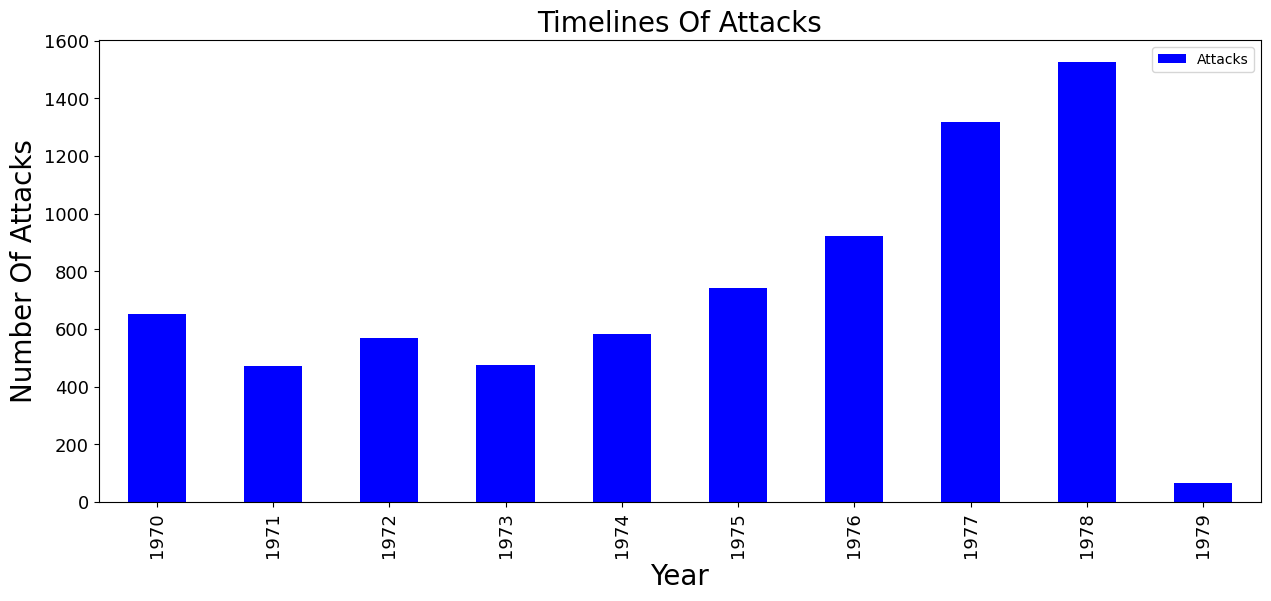

In [ ]:
attacks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Timelines Of Attacks",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number Of Attacks",fontsize=20)
plt.show()

# Total Casuality(Killed+Wounded) in each Year

In [ ]:
TC = data[["Year","Casualty"]].groupby("Year").sum()

In [ ]:
TC.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


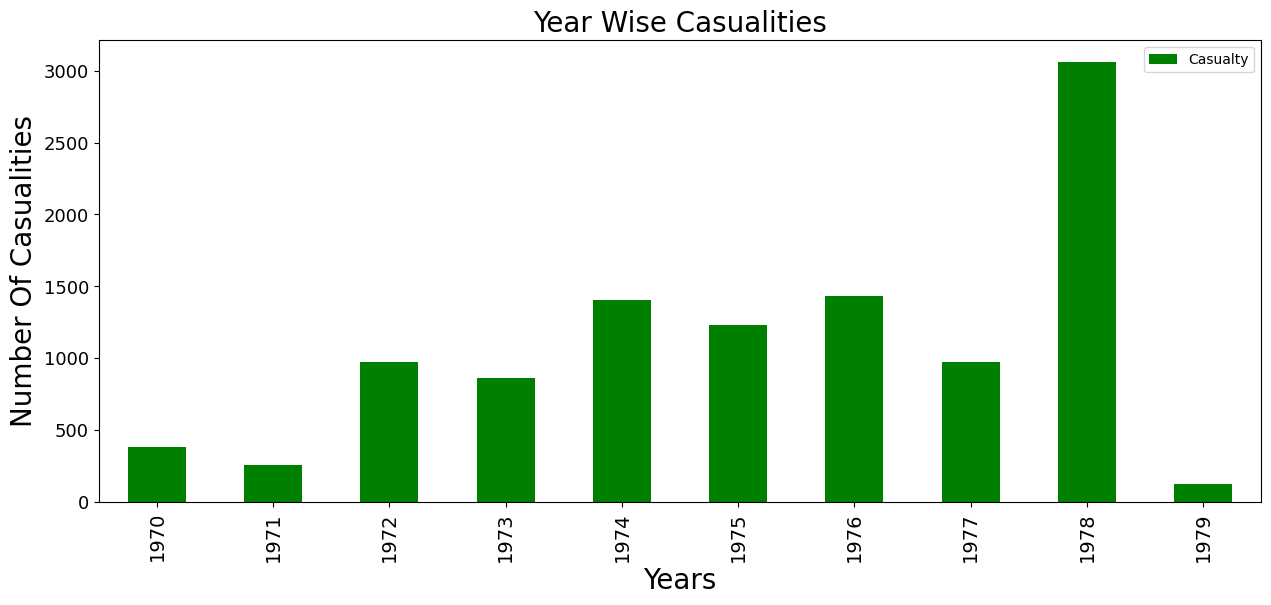

In [ ]:
TC.plot(kind="bar",color="green",figsize=(15,6),fontsize=13)
plt.title("Year Wise Casualities",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("Number Of Casualities",fontsize=20)
plt.show()

# Killed in Each Year

In [ ]:
YK = data[['Year',"Killed"]].groupby("Year").sum()

In [ ]:
YK.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


# Wounded in Each Year

In [ ]:
YW = data[["Year","Wounded"]].groupby("Year").sum()

In [ ]:
YW.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


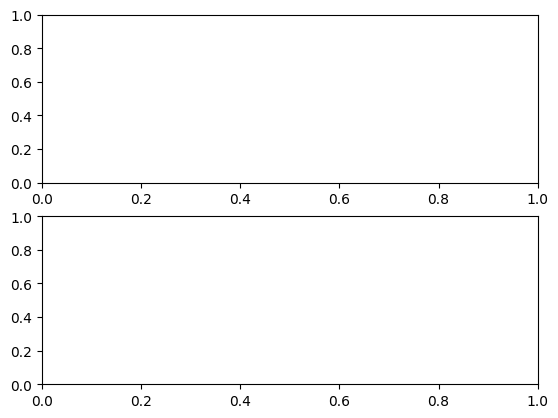

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Prediction For Killed


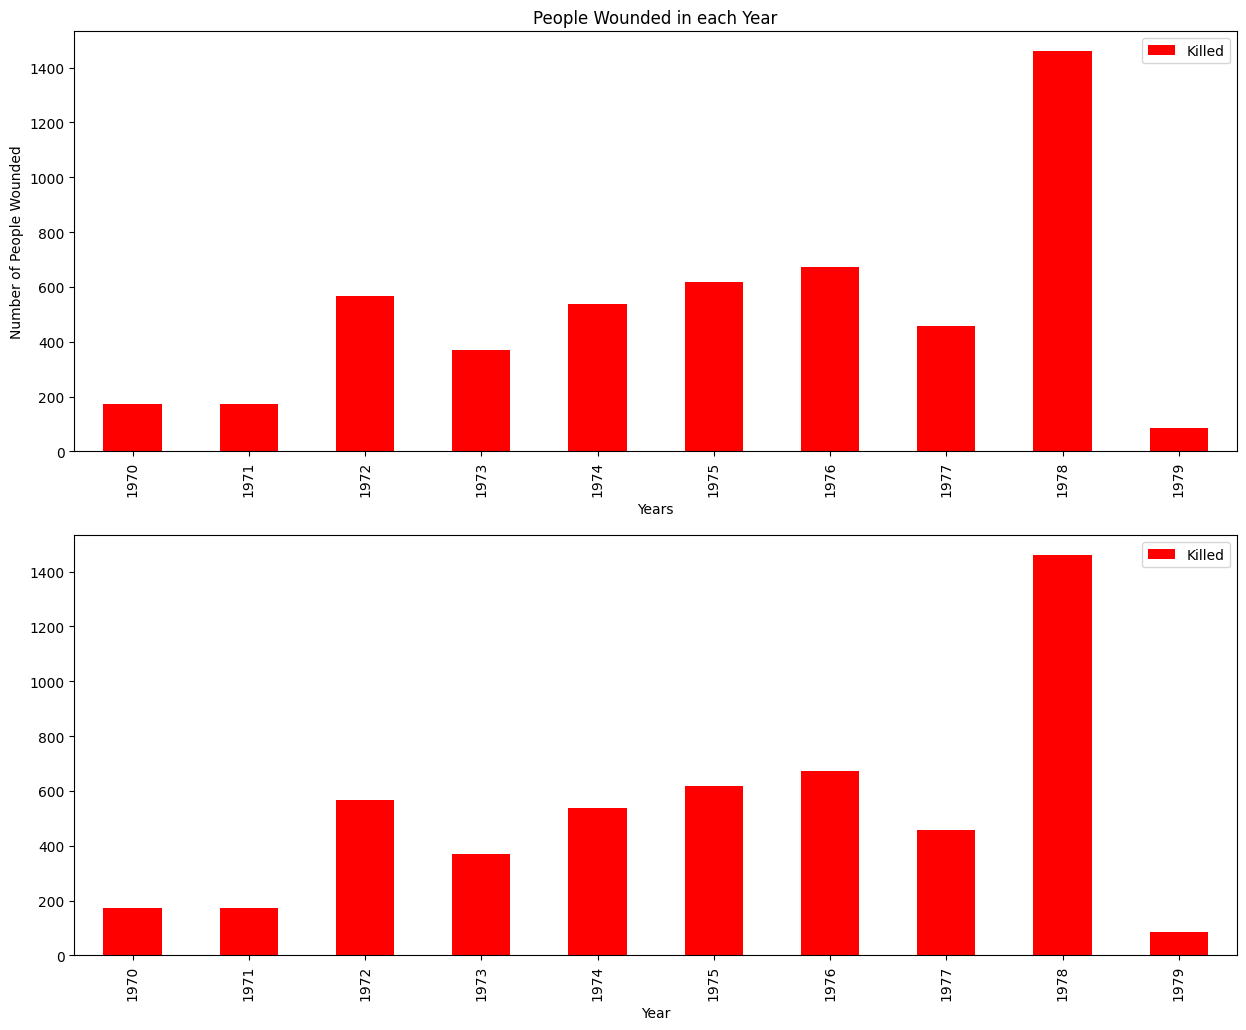

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Prediction For Killed
YK.plot(kind="bar",color="red",figsize=(15,12),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Prediction For Wounded
YK.plot(kind="bar",color="red",figsize=(15,12),ax=ax1)
ax0.set_title("People Wounded in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Wounded")

plt.show()

# ->->Region Wise Attacks<-<-

In [ ]:
#Distribution of terrorist attacks over regions

In [ ]:
regi = pd.crosstab(data['Year'],data['Region'])
regi.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


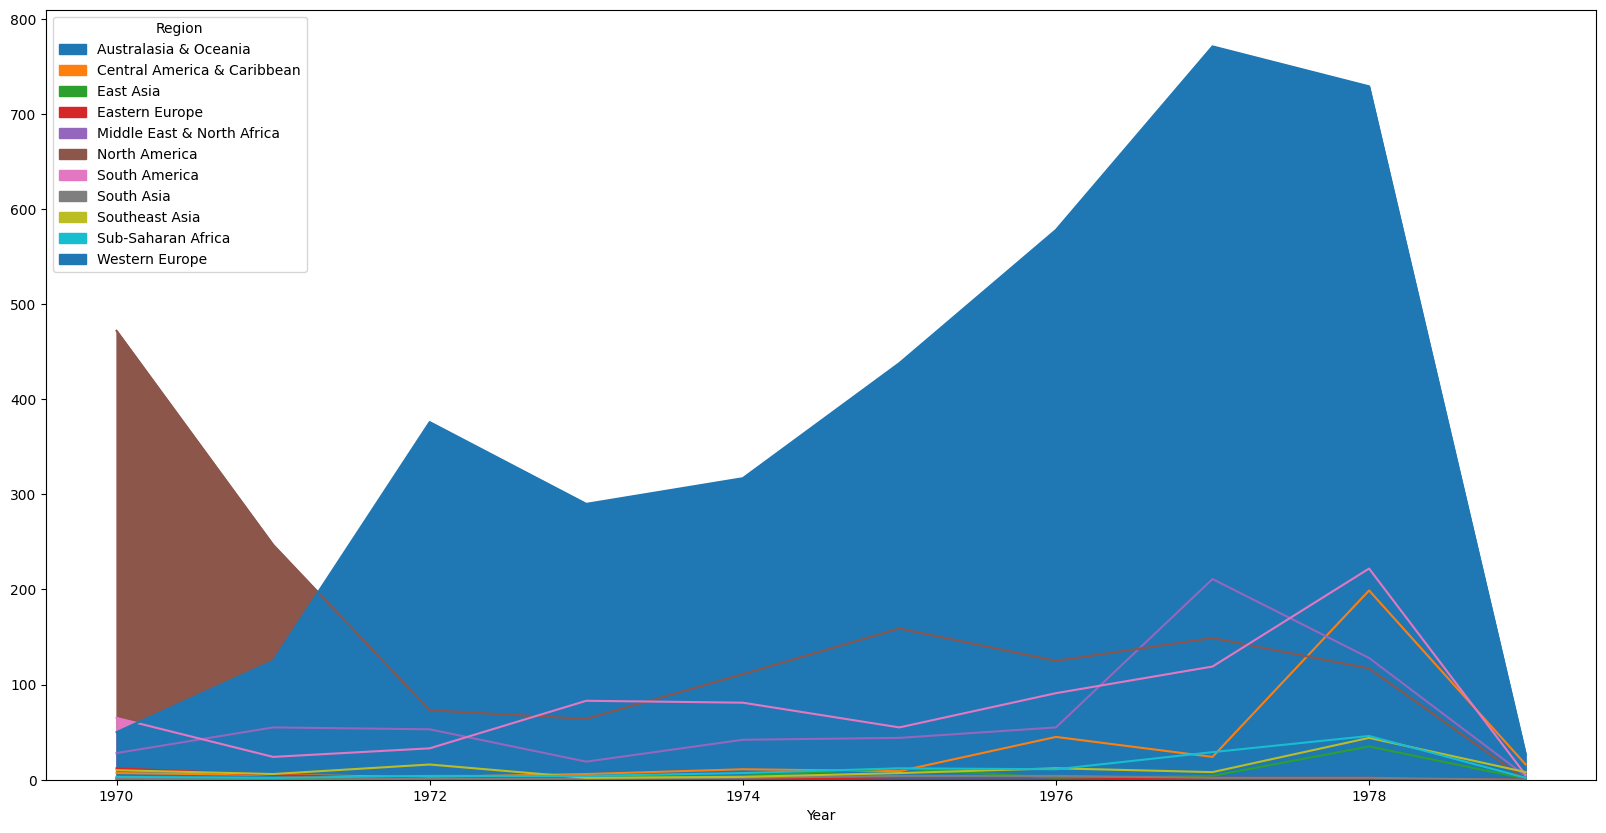

In [ ]:
regi.plot(kind="area",stacked=False,alpha=1,figsize=(20,10))
plt.show()

In [ ]:
#Total Terrorist Attacks in each Region from 1970-2017

In [ ]:
regt = regi.transpose()
regt["Total"]=regi.sum(axis=0)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 3701
North America                  1517
South America                   778
Middle East & North Africa      639
Central America & Caribbean     325
Sub-Saharan Africa              120
Southeast Asia                  116
East Asia                        63
Eastern Europe                   25
South Asia                       17
Australasia & Oceania            15
Name: Total, dtype: int64

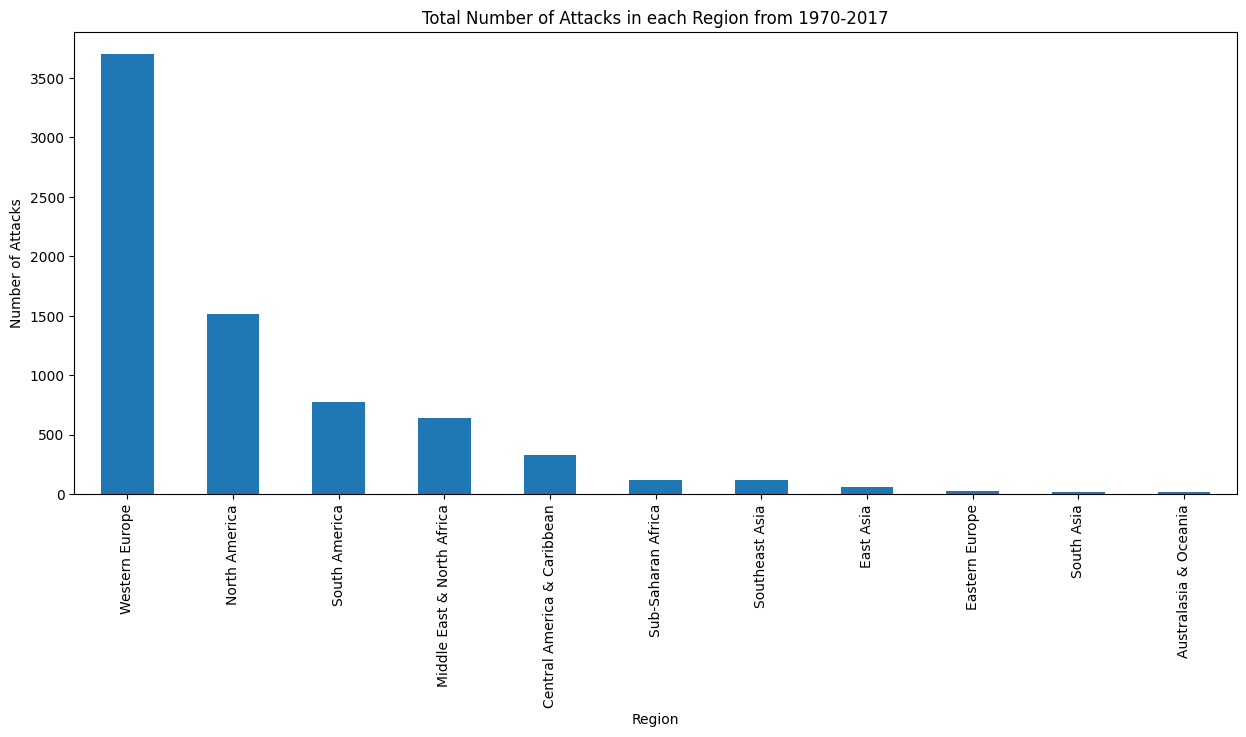

In [ ]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [ ]:
#Total Casualties (Killed + Wounded) in each Region

In [ ]:
data.describe()

,Year,Month,Day,Latitude,Longitute,Killed,Wounded,Casualty
count,7316.000000,7316.000000,7316.000000,7133.000000,7133.000000,7316.000000,7316.000000,7316.000000
mean,1975.003417,6.523237,15.129579,34.842112,-22.783191,0.699016,0.764899,1.463915
std,2.675243,3.477868,9.053688,22.248928,52.465516,5.912916,6.682300,9.512459
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1973.000000,3.000000,7.000000,33.888523,-73.931351,0.000000,0.000000,0.000000
50%,1976.000000,6.000000,15.000000,41.106178,-5.956210,0.000000,0.000000,0.000000
75%,1977.000000,10.000000,23.000000,48.856644,9.407588,1.000000,0.000000,1.000000
max,1979.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


In [ ]:
rc = data[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Western Europe,4527.0
Middle East & North Africa,2472.0
Southeast Asia,919.0
North America,856.0
South America,740.0
Central America & Caribbean,522.0
Sub-Saharan Africa,471.0
East Asia,98.0
Eastern Europe,48.0


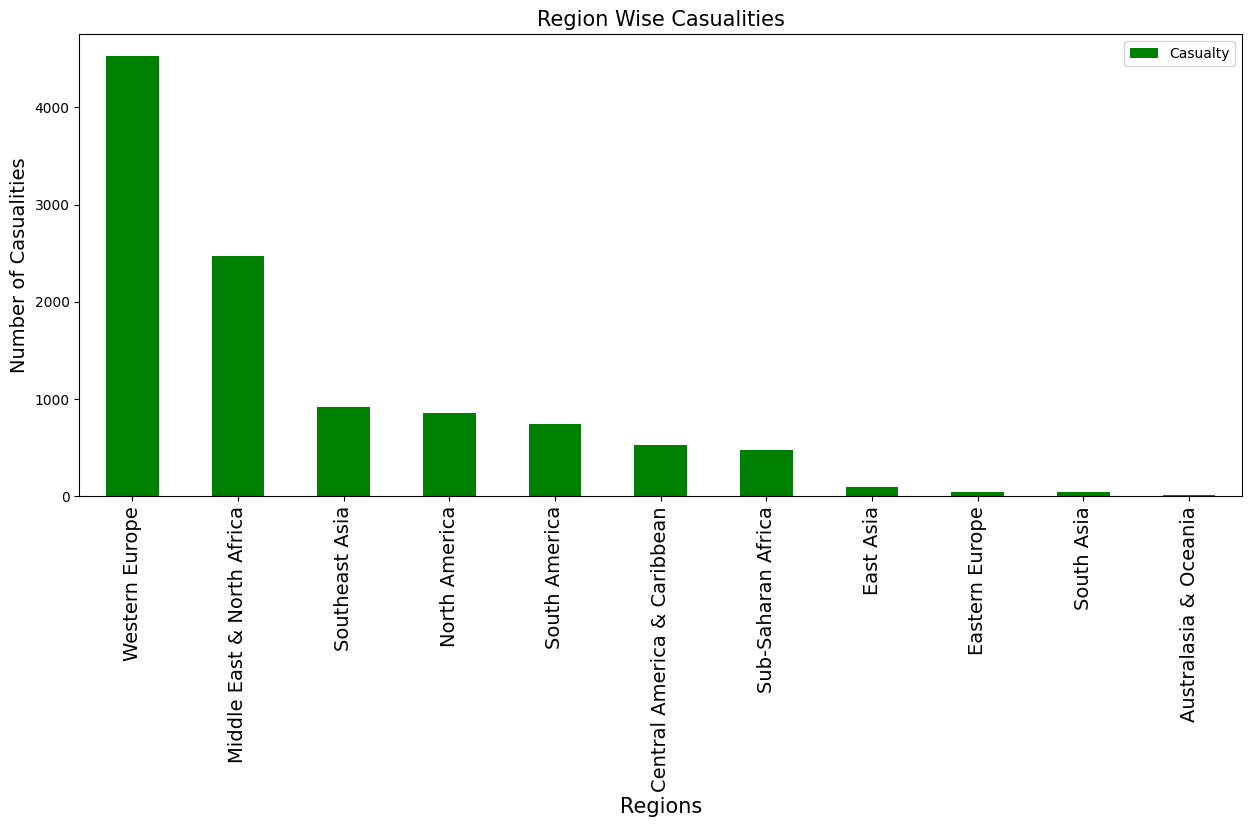

In [ ]:
rc.plot(kind="bar",color="green",figsize=(15,6))
plt.title("Region Wise Casualities",fontsize=15)
plt.xlabel("Regions",fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel("Number of Casualities",fontsize=14)
plt.show()

In [ ]:
#Killed in each Region

In [ ]:
rk = data[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Western Europe,2356.0
Middle East & North Africa,949.0
South America,472.0
Southeast Asia,463.0
Central America & Caribbean,345.0
North America,245.0
Sub-Saharan Africa,197.0
East Asia,35.0
Eastern Europe,33.0


In [ ]:
#Wounded in each Region

In [ ]:
rw = data[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Western Europe,2171.0
Middle East & North Africa,1523.0
North America,611.0
Southeast Asia,456.0
Sub-Saharan Africa,274.0
South America,268.0
Central America & Caribbean,177.0
East Asia,63.0
South Asia,29.0


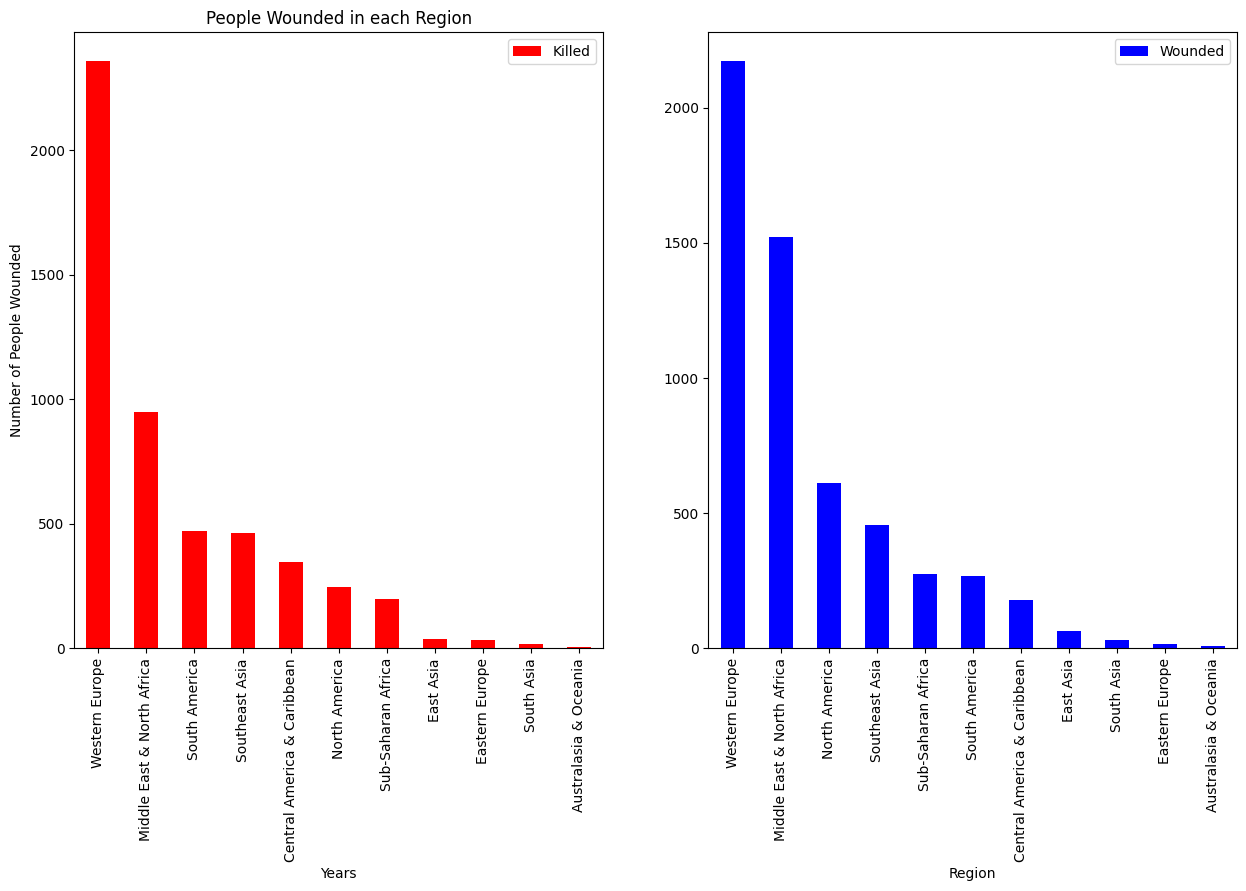

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Prediction For Killed
rk.plot(kind="bar",color="red",figsize=(15,8),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Prediction For Wounded
rw.plot(kind="bar",color="blue",figsize=(15,8),ax=ax1)
ax0.set_title("People Wounded in each Region")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Wounded")

plt.show()

# Country wise Attacks 


In [ ]:
#Number of Attacks in each Country

In [ ]:
ct = data['Country'].value_counts().head(10)
ct

United Kingdom        1407
United States         1406
Italy                  824
Spain                  632
Turkey                 343
Argentina              314
Colombia               282
France                 265
West Germany (FRG)     256
Greece                 134
Name: Country, dtype: int64

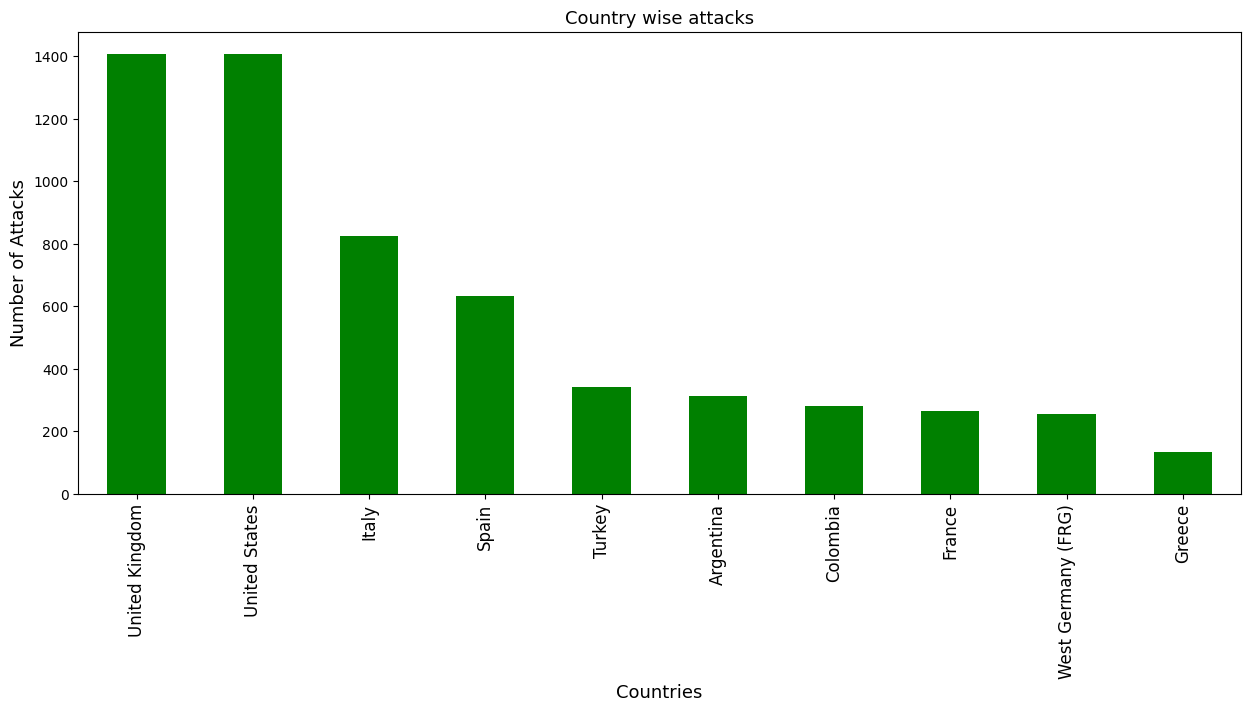

In [ ]:
ct.plot(kind="bar",color="green",figsize=(15,6))
plt.title("Country wise attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
#Total Casualties (Killed + Wounded) in each Country


In [ ]:
cnc = data[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
United Kingdom,2747.0
Israel,822.0
United States,725.0
Philippines,554.0
Iran,534.0
Spain,518.0
Italy,502.0
Argentina,464.0
Lebanon,360.0


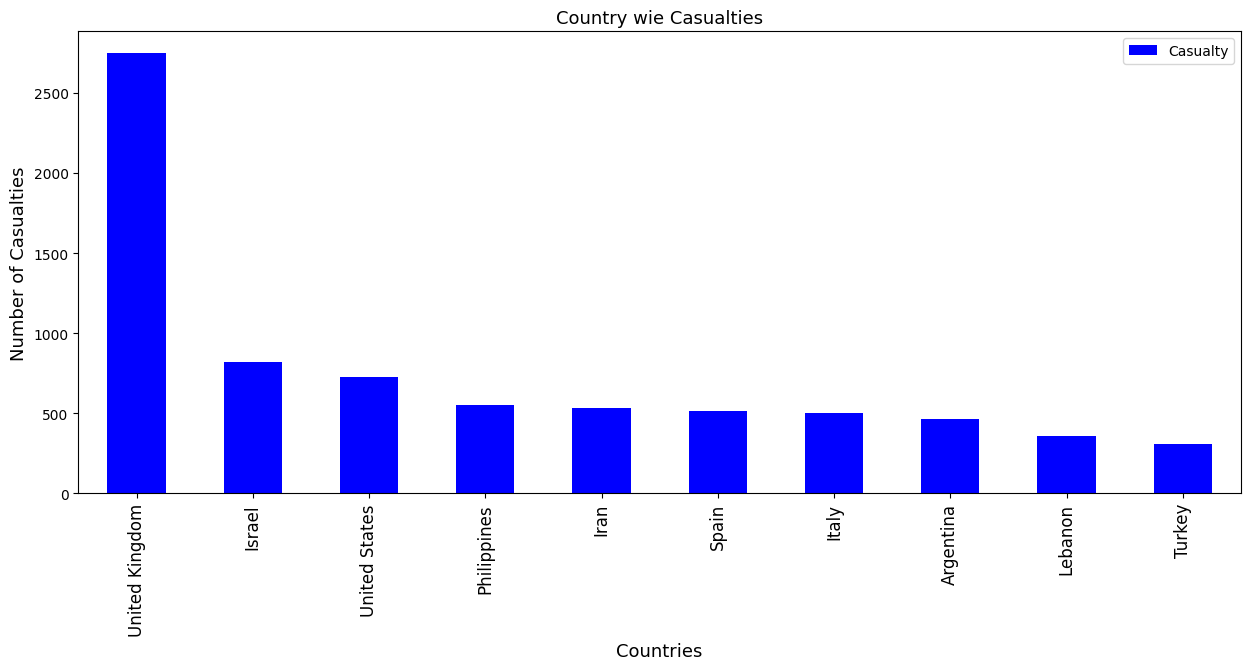

In [ ]:
cnc[:10].plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
#Killed in each Country

In [ ]:
cnk = data[['Country','Killed']].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
United Kingdom,1638.0
Iran,469.0
Argentina,317.0
Philippines,228.0
Spain,209.0
Israel,190.0
United States,164.0
Nicaragua,152.0
Italy,147.0


In [ ]:
#Wounded in each Country


In [ ]:
cnw = data[['Country','Wounded']].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
United Kingdom,1109.0
Israel,632.0
United States,561.0
Italy,355.0
Philippines,326.0
Spain,309.0
Iraq,286.0
Turkey,230.0
Lebanon,214.0


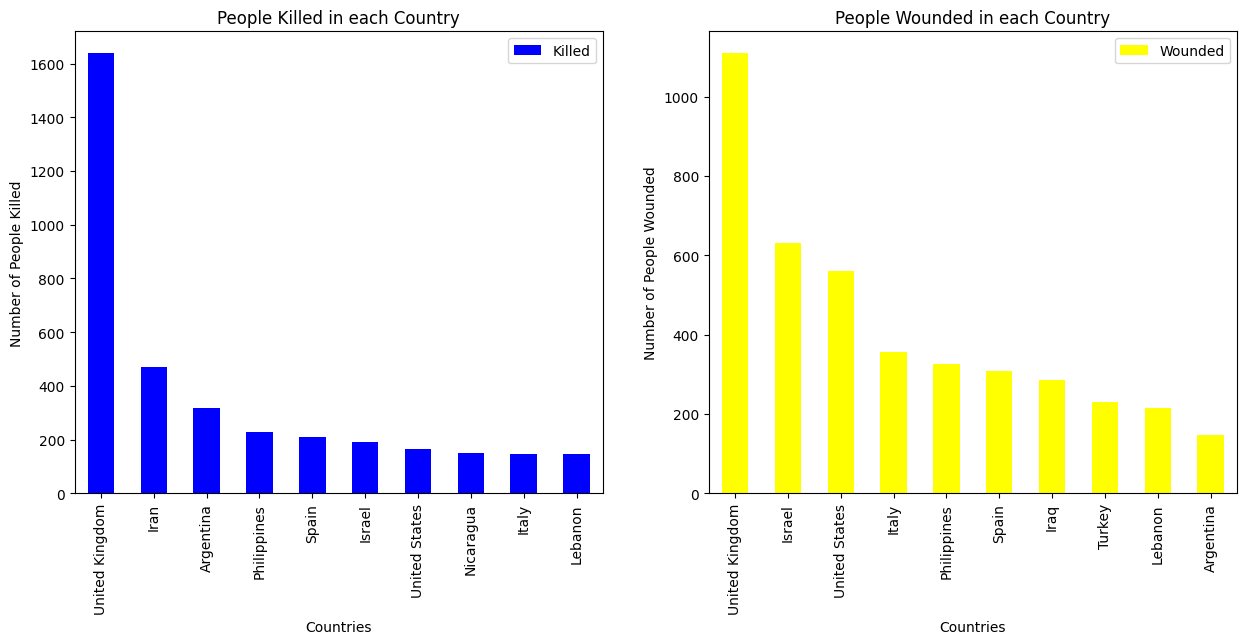

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="yellow",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()


# City wise Attacks - Top 10

In [ ]:
#Number of Attacks in each city

In [ ]:
city =data["City"].value_counts()[1:11]
city

New York City    317
Rome             290
Unknown          212
Buenos Aires     188
Madrid           152
Paris            137
Athens           121
Ankara           115
Bogota           106
Milan            104
Name: City, dtype: int64

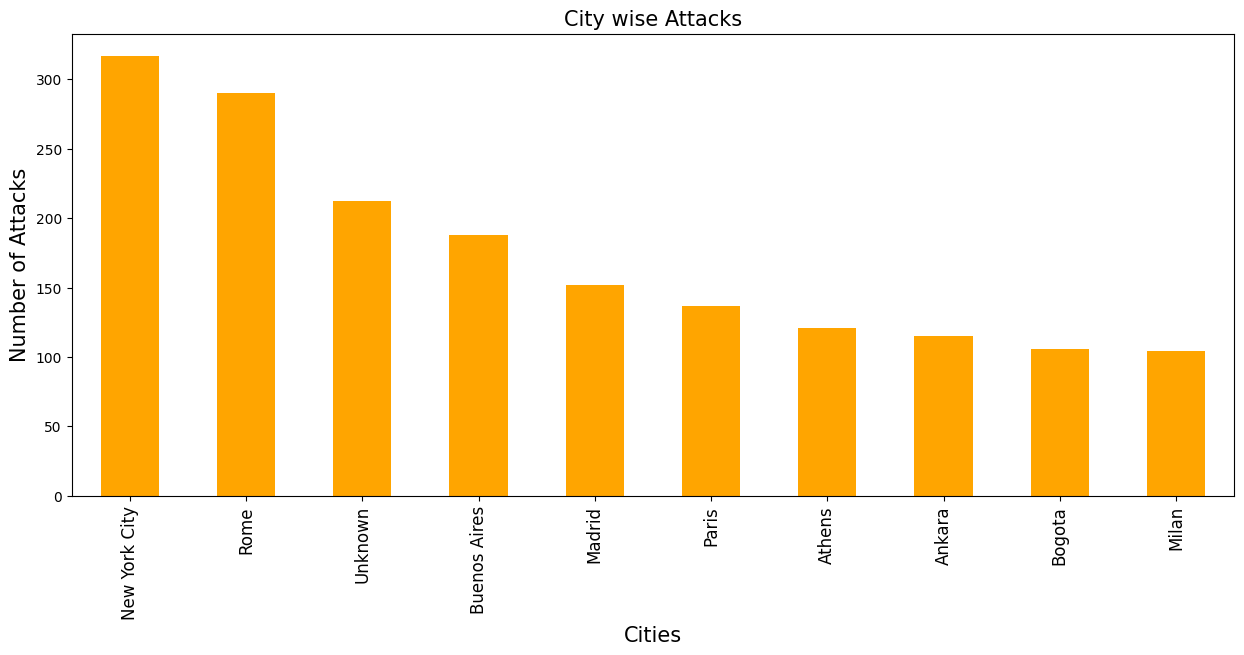

In [ ]:
city.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("City wise Attacks",fontsize=15)
plt.xlabel("Cities",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [ ]:
#Total Casualties (Killed + Wounded) in each City

In [ ]:
cc=data[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Belfast,1098.0
London,534.0
Abadan,422.0
Buenos Aires,337.0
Beirut,334.0
Baghdad,297.0
Jerusalem,293.0
New York City,278.0
Rome,188.0


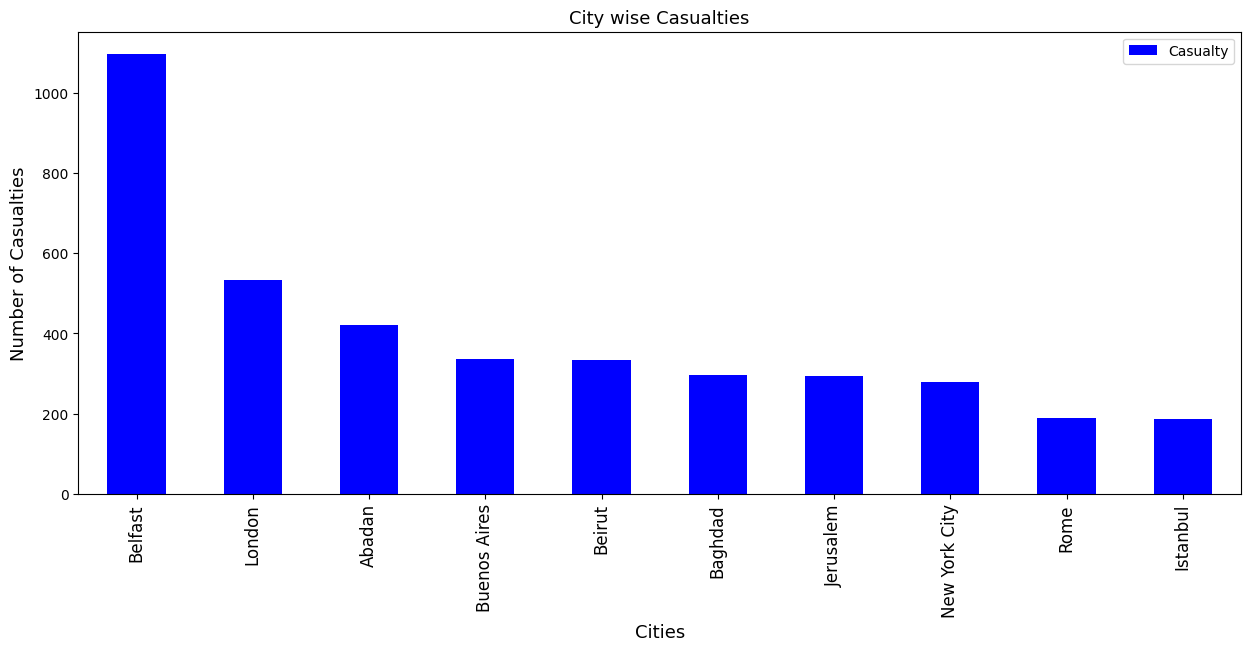

In [ ]:
cc[:10].plot(kind="bar",color="blue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
#Killed in each City

In [ ]:
cc=data[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
cc.head(10)

,Killed
City,
Belfast,836.0
Abadan,422.0
Buenos Aires,215.0
Beirut,120.0
Athens,112.0
Rome,92.0
Pleiku,81.0
Londonderry,75.0
Grantly Adams International Airport,73.0


In [ ]:
#Wounded in each City

In [ ]:
cc=data[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cc.head(10)

,Wounded
City,
London,499.0
Baghdad,285.0
Jerusalem,269.0
Belfast,262.0
New York City,240.0
Beirut,214.0
Birmingham,162.0
Istanbul,156.0
Buenos Aires,122.0


Text(0, 0.5, 'Number of People Wounded')

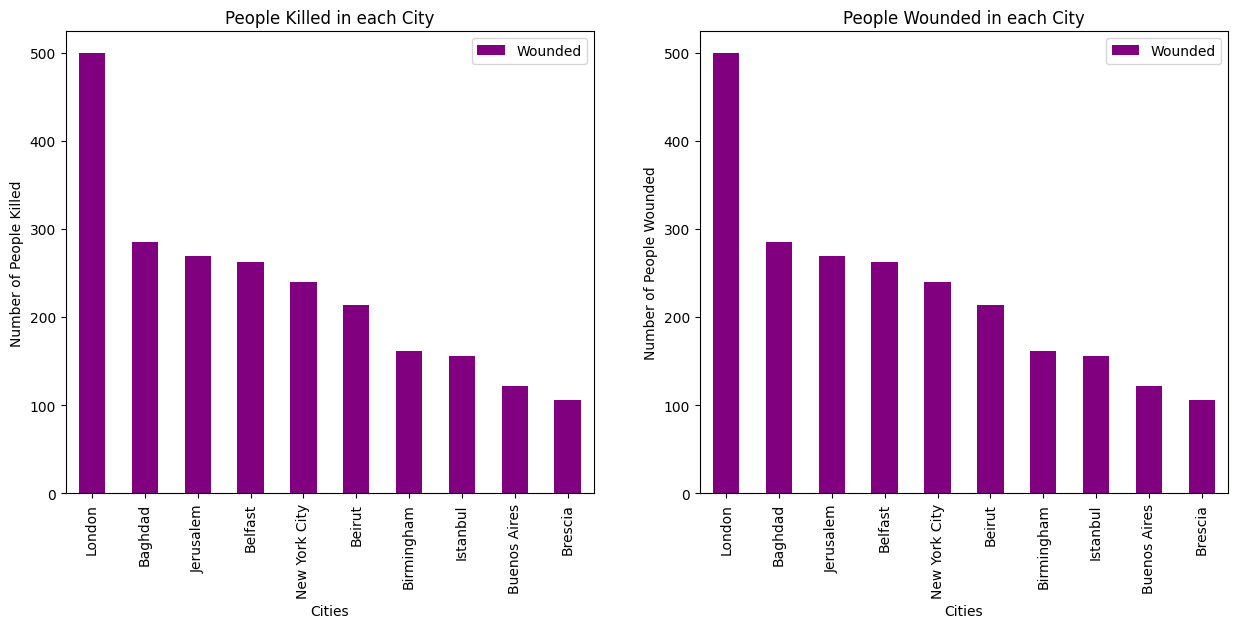

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cc[:10].plot(kind="bar",color="purple",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cc[:10].plot(kind="bar",color="purple",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

# Terrorist Group Wise Attacks

In [ ]:
#Number of attacks of each group|

In [ ]:
group = data['Group Name'].value_counts()[1:10]
group

Irish Republican Army (IRA)                      820
Basque Fatherland and Freedom (ETA)              263
Protestant extremists                            188
Left-Wing Militants                              169
Ulster Volunteer Force (UVF)                     164
Red Brigades                                     124
Black September                                  120
Montoneros (Argentina)                           109
Fuerzas Armadas de Liberacion Nacional (FALN)     96
Name: Group Name, dtype: int64

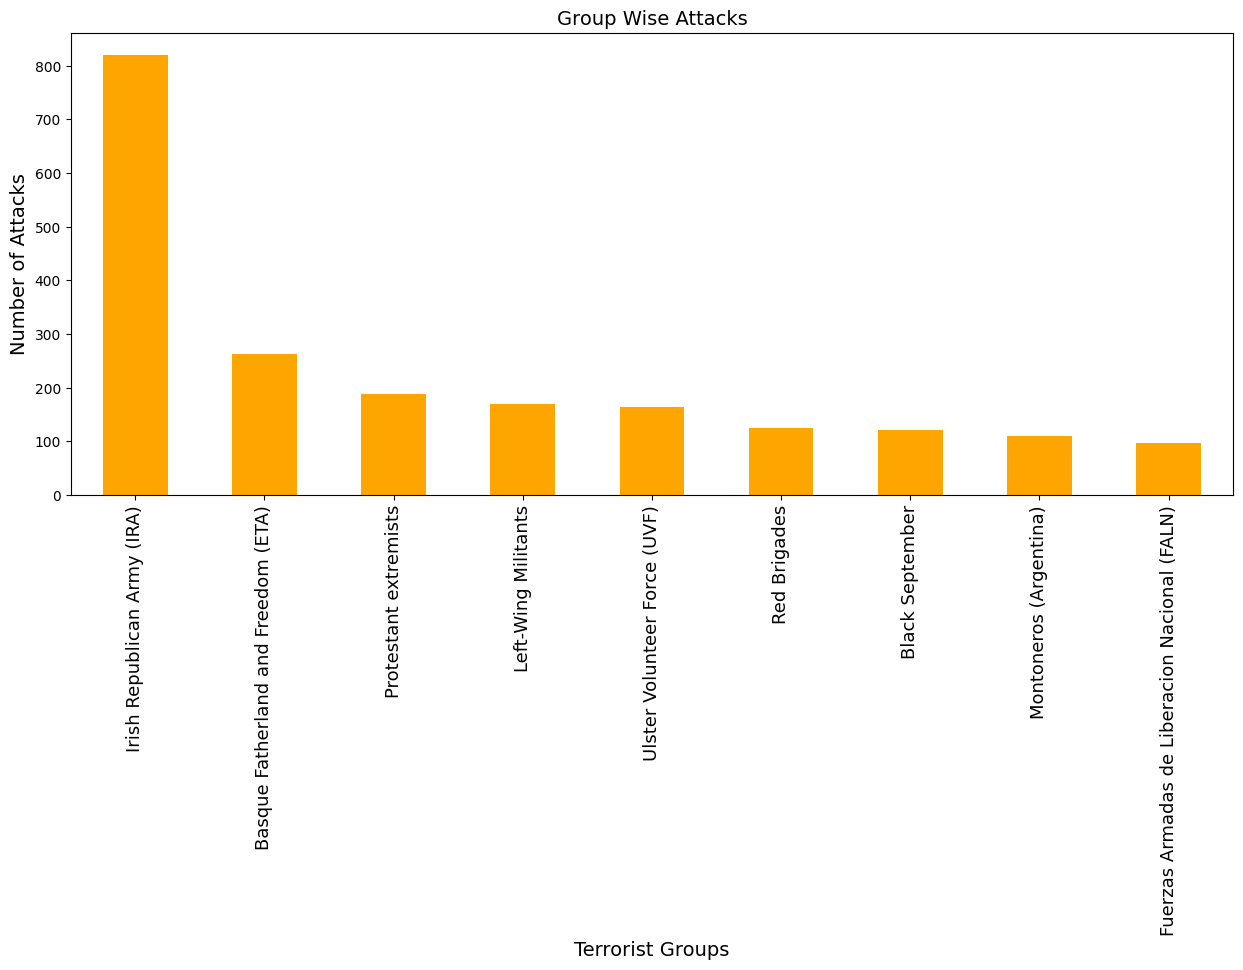

In [ ]:
group.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Group Wise Attacks",fontsize=14)
plt.xlabel("Terrorist Groups",fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [ ]:
#Total Casualties(Killed + Wounded) by each Group


In [ ]:
GC = data[['Group Name','Casualty']].groupby("Group Name").sum().sort_values(by='Casualty',ascending=False).drop("Unknown")
GC.head(10)

,Casualty
Group Name,
Irish Republican Army (IRA),1915.0
Mujahedin-e Khalq (MEK),455.0
Basque Fatherland and Freedom (ETA),344.0
Montoneros (Argentina),324.0
Popular Front for the Liberation of Palestine (PFLP),279.0
Ulster Volunteer Force (UVF),276.0
Ahmad Jibril,258.0
Palestinians,233.0
Sandinista National Liberation Front (FSLN),230.0


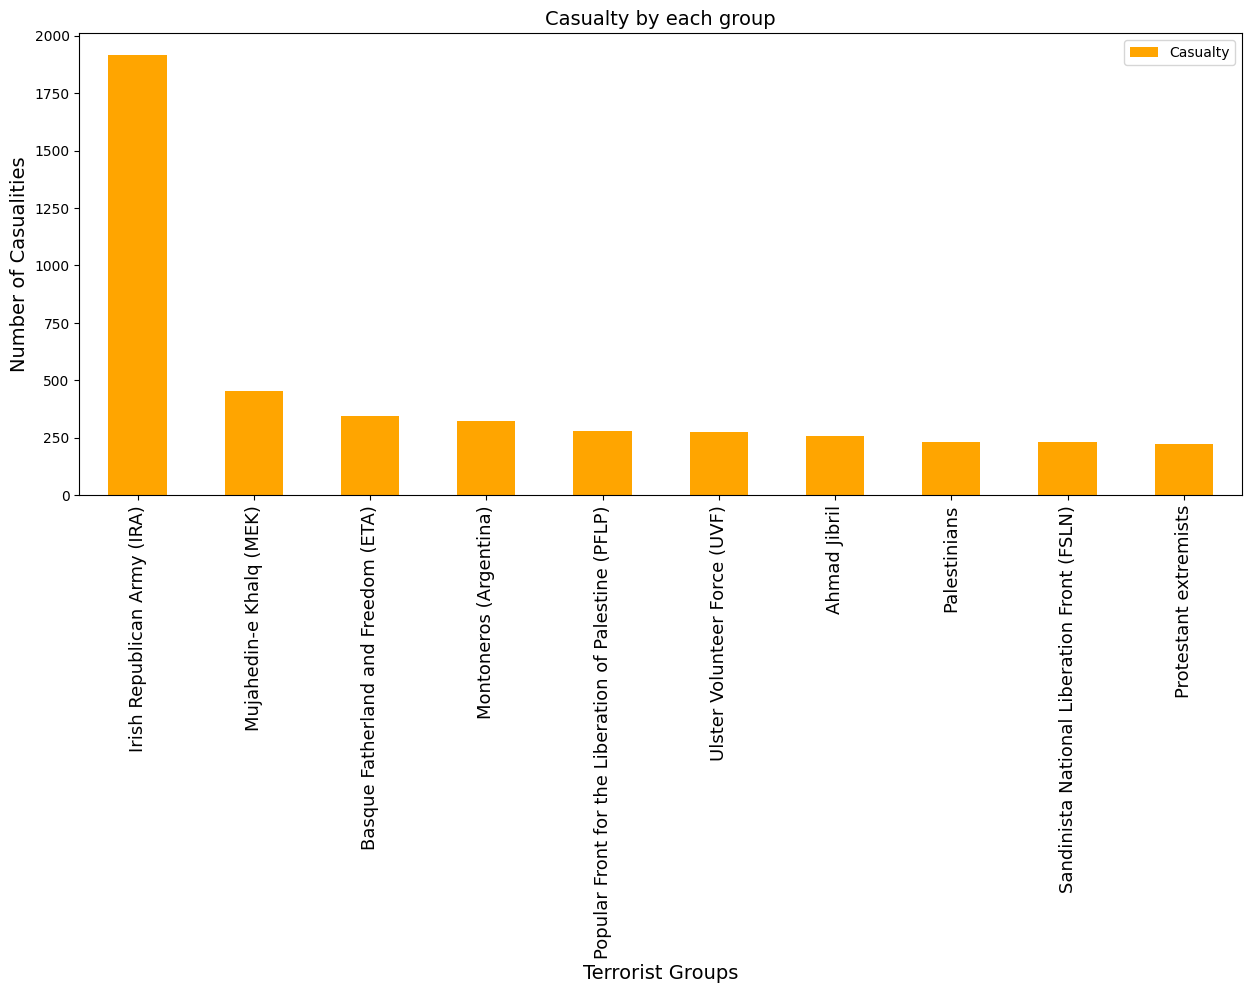

In [ ]:
GC[:10].plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Casualty by each group",fontsize=14)
plt.xlabel("Terrorist Groups",fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel("Number of Casualities",fontsize=14)
plt.show()

In [ ]:
#Killed by each group

In [ ]:
GK = data[['Group Name','Killed']].groupby("Group Name").sum().sort_values(by='Killed',ascending=False).drop("Unknown")
GK.head(10)

,Killed
Group Name,
Irish Republican Army (IRA),899.0
Mujahedin-e Khalq (MEK),448.0
Ulster Volunteer Force (UVF),275.0
Protestant extremists,221.0
Montoneros (Argentina),202.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",156.0
Sandinista National Liberation Front (FSLN),141.0
Basque Fatherland and Freedom (ETA),134.0
Moro National Liberation Front (MNLF),110.0


In [ ]:
#Wounded by each group

In [ ]:
GW = data[['Group Name','Wounded']].groupby("Group Name").sum().sort_values(by='Wounded',ascending=False).drop("Unknown")
GW.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),1016.0
Popular Front for the Liberation of Palestine (PFLP),217.0
Basque Fatherland and Freedom (ETA),210.0
Palestinians,206.0
Ahmad Jibril,160.0
Black Order,152.0
Democratic Front for the Liberation of Palestine (DFLP),151.0
Black September,122.0
Montoneros (Argentina),122.0


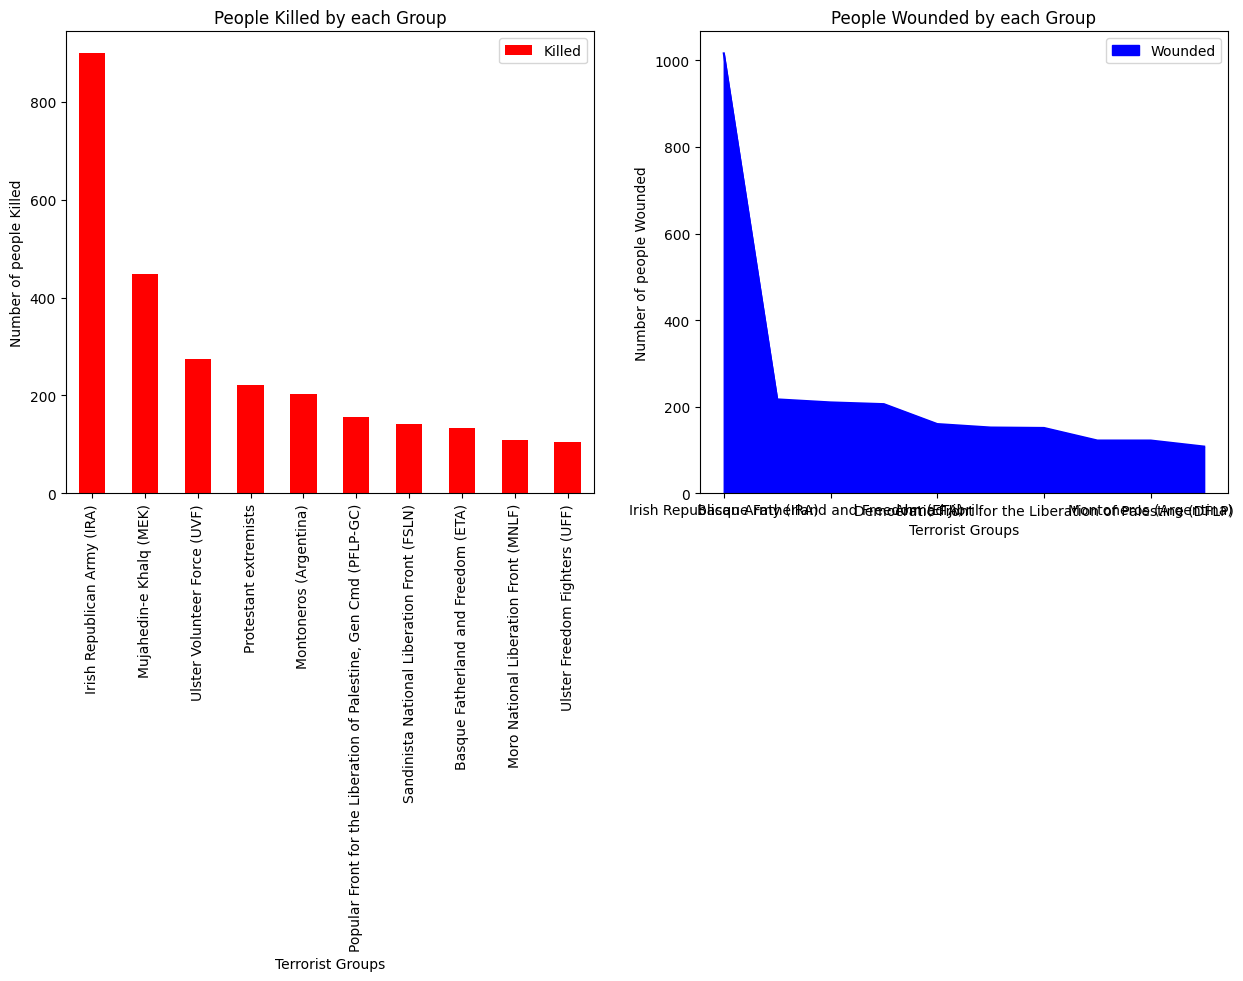

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
GK[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
GW[:10].plot(kind="area",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# Attack Type wise Attacks

In [ ]:
#Number of Attacks by each Attack Type

In [ ]:
AT = data["Attack Type"].value_counts()
AT

Bombing/Explosion                      3277
Assassination                          1490
Armed Assault                           989
Facility/Infrastructure Attack          908
Hostage Taking (Kidnapping)             395
Hostage Taking (Barricade Incident)      96
Unknown                                  91
Hijacking                                52
Unarmed Assault                          18
Name: Attack Type, dtype: int64

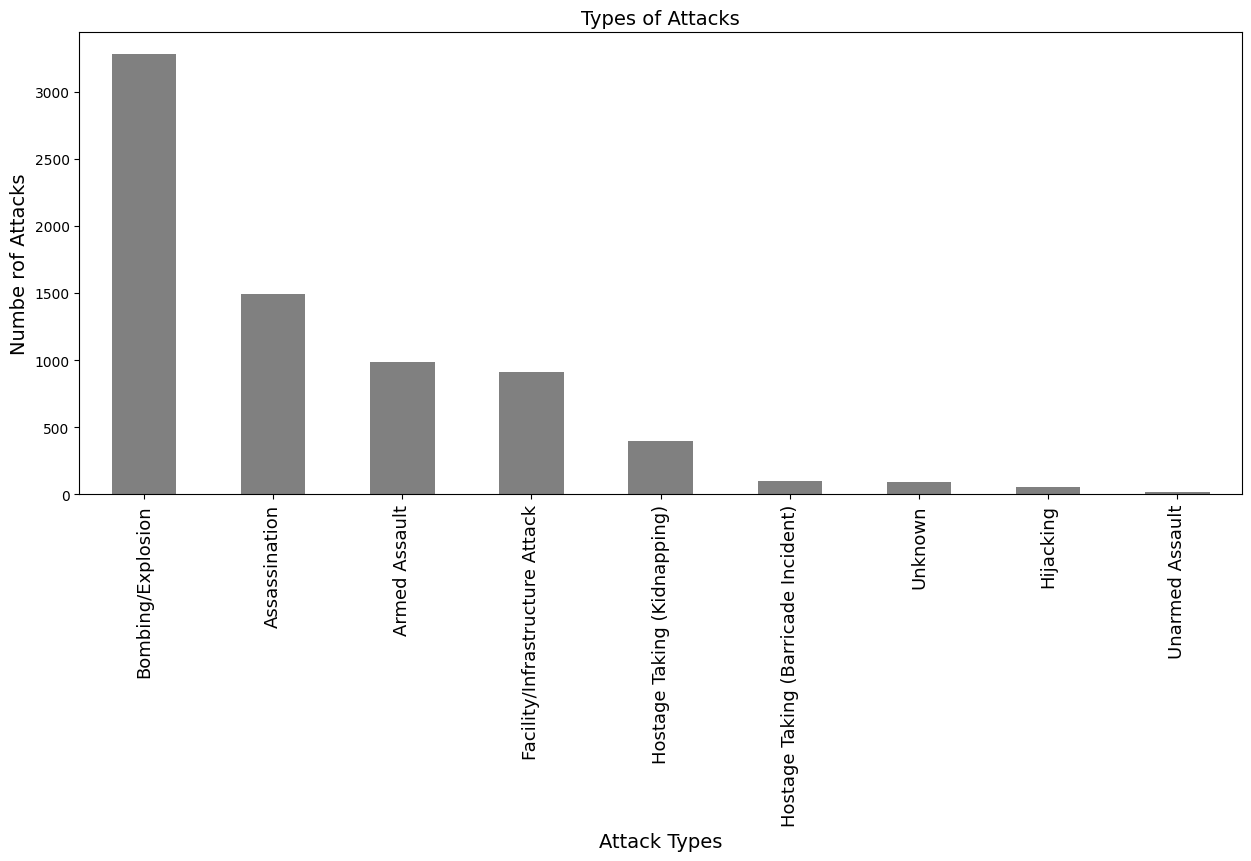

In [ ]:
AT.plot(kind="bar",color="grey",figsize=(15,6))
plt.title("Types of Attacks",fontsize=14)
plt.xlabel("Attack Types",fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel("Numbe rof Attacks",fontsize=14)
plt.show()

In [ ]:
#Total Casualties (Killed + Wounded) by each Attack Type


In [ ]:
AC = data[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
AC

,Casualty
Attack Type,
Bombing/Explosion,5848.0
Assassination,1758.0
Armed Assault,1531.0
Facility/Infrastructure Attack,658.0
Hostage Taking (Barricade Incident),421.0
Hijacking,226.0
Hostage Taking (Kidnapping),134.0
Unknown,120.0
Unarmed Assault,14.0


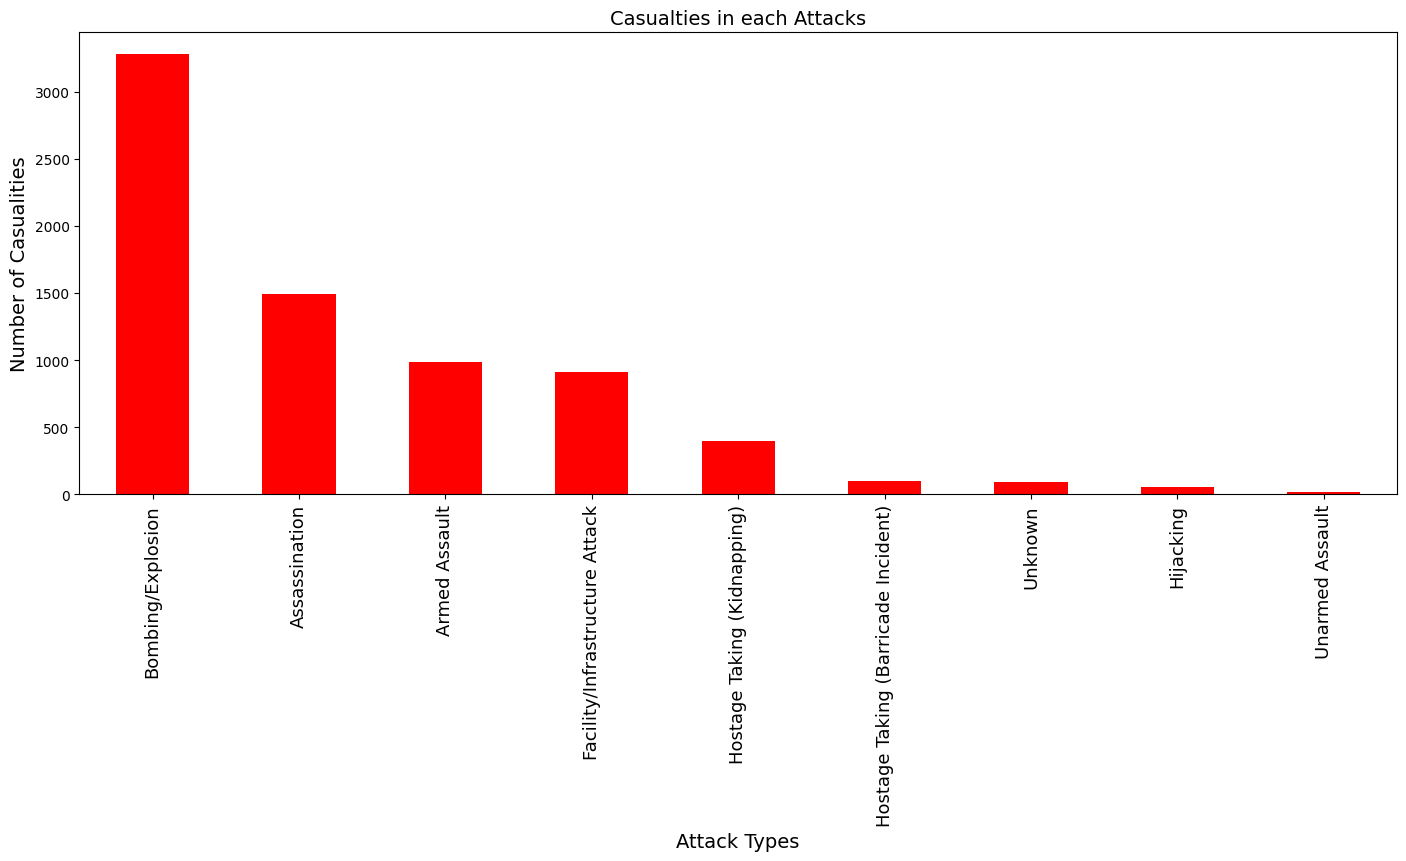

In [ ]:
AT.plot(kind="bar",color="Red",figsize=(17,6))
plt.title("Casualties in each Attacks",fontsize=14)
plt.xlabel("Attack Types",fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel("Number of Casualities",fontsize=14)
plt.show()

In [ ]:
#Killed by each Attack Type

In [ ]:
AK = data[['Attack Type','Killed']].groupby("Attack Type").sum().sort_values(by='Killed',ascending=False)
AK

,Killed
Attack Type,
Bombing/Explosion,1568.0
Assassination,1484.0
Armed Assault,1050.0
Facility/Infrastructure Attack,454.0
Hostage Taking (Barricade Incident),177.0
Hijacking,175.0
Hostage Taking (Kidnapping),113.0
Unknown,85.0
Unarmed Assault,8.0


In [ ]:
AW = data[['Attack Type','Wounded']].groupby("Attack Type").sum().sort_values(by='Wounded',ascending=False)
AW

,Wounded
Attack Type,
Bombing/Explosion,4280.0
Armed Assault,481.0
Assassination,274.0
Hostage Taking (Barricade Incident),244.0
Facility/Infrastructure Attack,204.0
Hijacking,51.0
Unknown,35.0
Hostage Taking (Kidnapping),21.0
Unarmed Assault,6.0


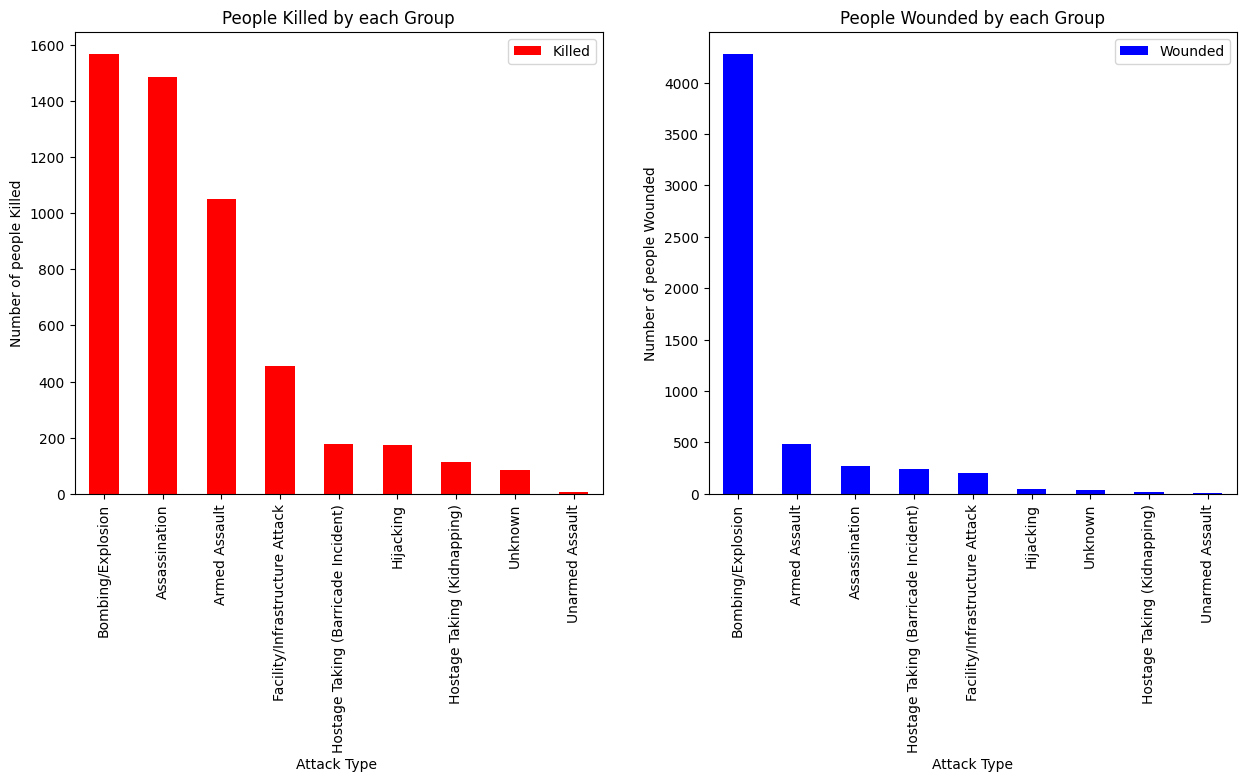

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
AK.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Attack Type ")
ax0.set_ylabel("Number of people Killed")

#Wounded
AW.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Attack Type")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# Target Type wise attacks

In [ ]:
#Number of Attacks over each Target Type

In [ ]:
TA = data["Target Type"].value_counts()
TA

Business                          1877
Private Citizens & Property       1155
Military                           837
Government (General)               809
Police                             713
Government (Diplomatic)            579
Airports & Aircraft                225
Educational Institution            205
Journalists & Media                197
Utilities                          151
Transportation                     149
Terrorists/Non-State Militia       120
Religious Figures/Institutions      69
Telecommunication                   48
Violent Political Party             45
NGO                                 30
Unknown                             29
Tourists                            25
Maritime                            19
Food or Water Supply                16
Abortion Related                    10
Other                                8
Name: Target Type, dtype: int64

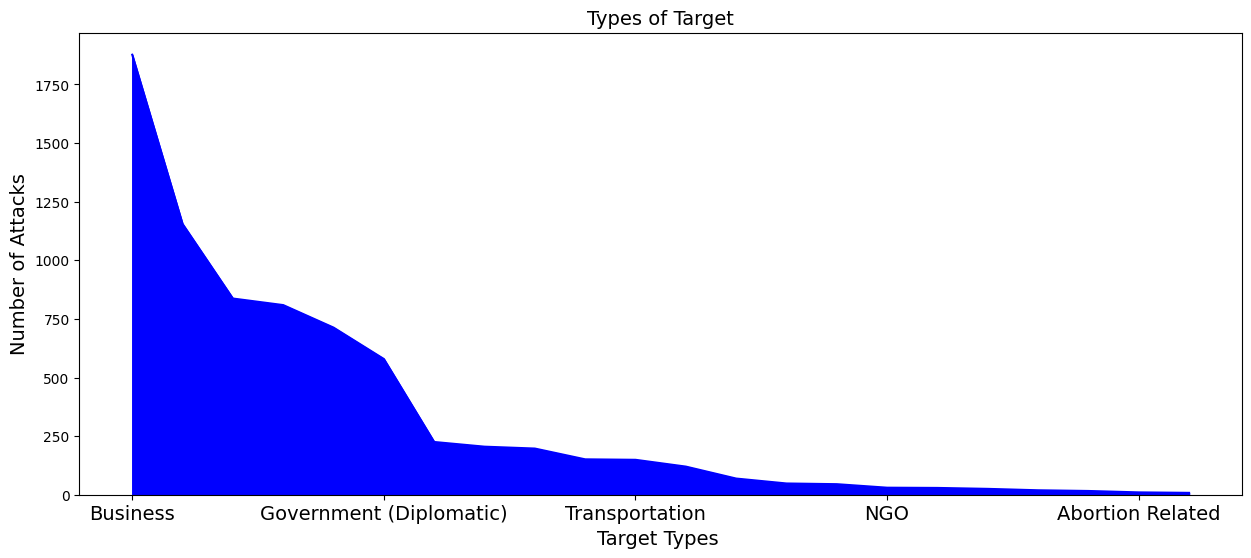

In [ ]:
TA.plot(kind="area",color="blue",figsize=(15,6))
plt.title("Types of Target",fontsize=14)
plt.xlabel("Target Types ",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.show()

In [ ]:
TC=data[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
TC

,Casualty
Target Type,
Business,2317.0
Private Citizens & Property,1624.0
Airports & Aircraft,1606.0
Military,1219.0
Government (General),884.0
Police,850.0
Transportation,637.0
Educational Institution,366.0
Government (Diplomatic),290.0


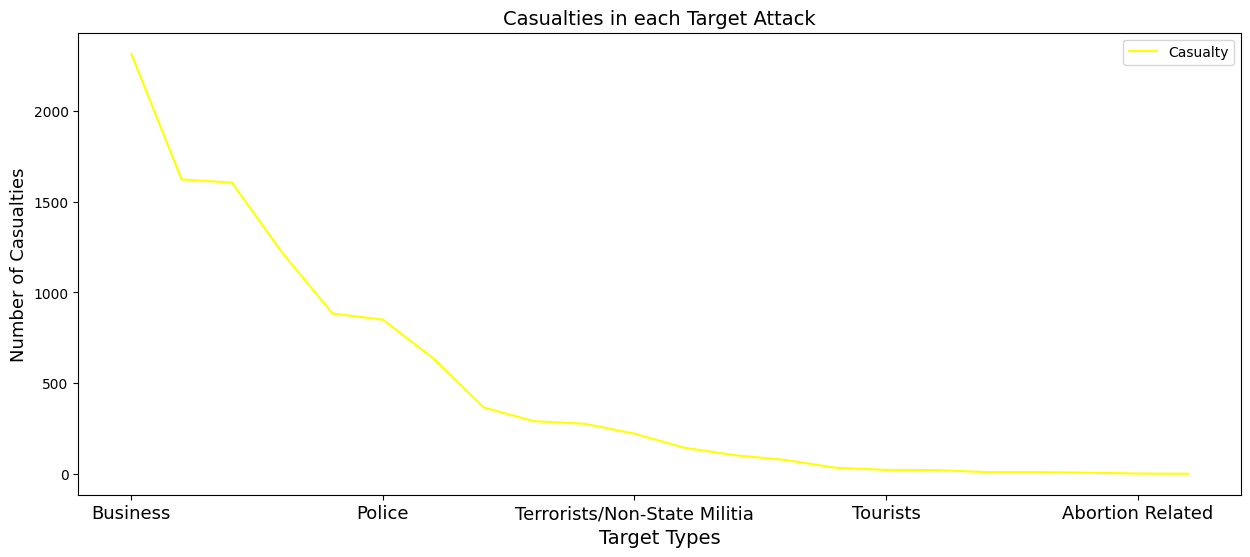

In [ ]:
TC.plot(kind="line",color="yellow",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=14)
plt.xlabel("Target Types",fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
TK=data[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
TK


,Killed
Target Type,
Private Citizens & Property,994.0
Business,951.0
Military,886.0
Airports & Aircraft,718.0
Police,506.0
Government (General),234.0
Terrorists/Non-State Militia,206.0
Transportation,174.0
Violent Political Party,114.0


In [ ]:
TW=data[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
TW

,Wounded
Target Type,
Business,1366.0
Airports & Aircraft,888.0
Government (General),650.0
Private Citizens & Property,630.0
Transportation,463.0
Police,344.0
Military,333.0
Educational Institution,309.0
Government (Diplomatic),205.0


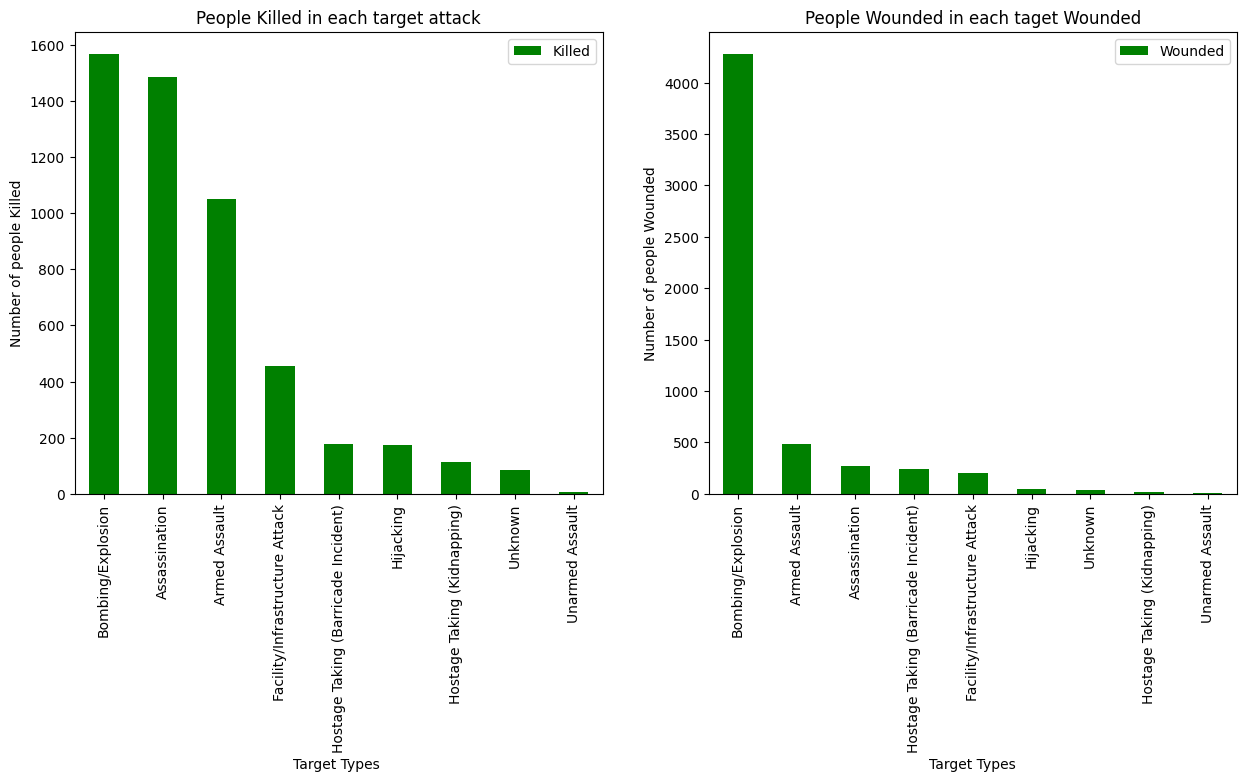

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
AK.plot(kind="bar",color="green",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each target attack")
ax0.set_xlabel("Target Types ")
ax0.set_ylabel("Number of people Killed")

#Wounded
AW.plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each taget Wounded")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# Group & Country Wise



In [ ]:
#Sorting by number of Attacks

In [ ]:
gca=data[["Group Name","Country"]].value_counts()
gca.head(10)

Group Name                           Country           
Irish Republican Army (IRA)          United Kingdom        791
Unknown                              Italy                 398
Basque Fatherland and Freedom (ETA)  Spain                 259
Unknown                              Turkey                248
                                     United States         202
Protestant extremists                United Kingdom        186
Left-Wing Militants                  United States         169
Ulster Volunteer Force (UVF)         United Kingdom        159
Unknown                              West Germany (FRG)    129
Red Brigades                         Italy                 123
dtype: int64

In [ ]:
#Sorting by Number of Casualties

In [ ]:
GCA.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()


NameError: ignored

In [ ]:
GCC=data[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
GCC


<ipython-input-101-5ecea3a5368e>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  GCC=data[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


,,Casualty
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,1897.0
Mujahedin-e Khalq (MEK),Iran,455.0
Basque Fatherland and Freedom (ETA),Spain,342.0
Montoneros (Argentina),Argentina,324.0
Ahmad Jibril,Lebanon,258.0
Ulster Volunteer Force (UVF),United Kingdom,239.0
Sandinista National Liberation Front (FSLN),Nicaragua,230.0
Protestant extremists,United Kingdom,218.0
Moro National Liberation Front (MNLF),Philippines,218.0


In [ ]:
#Sorting by Number of Casualties

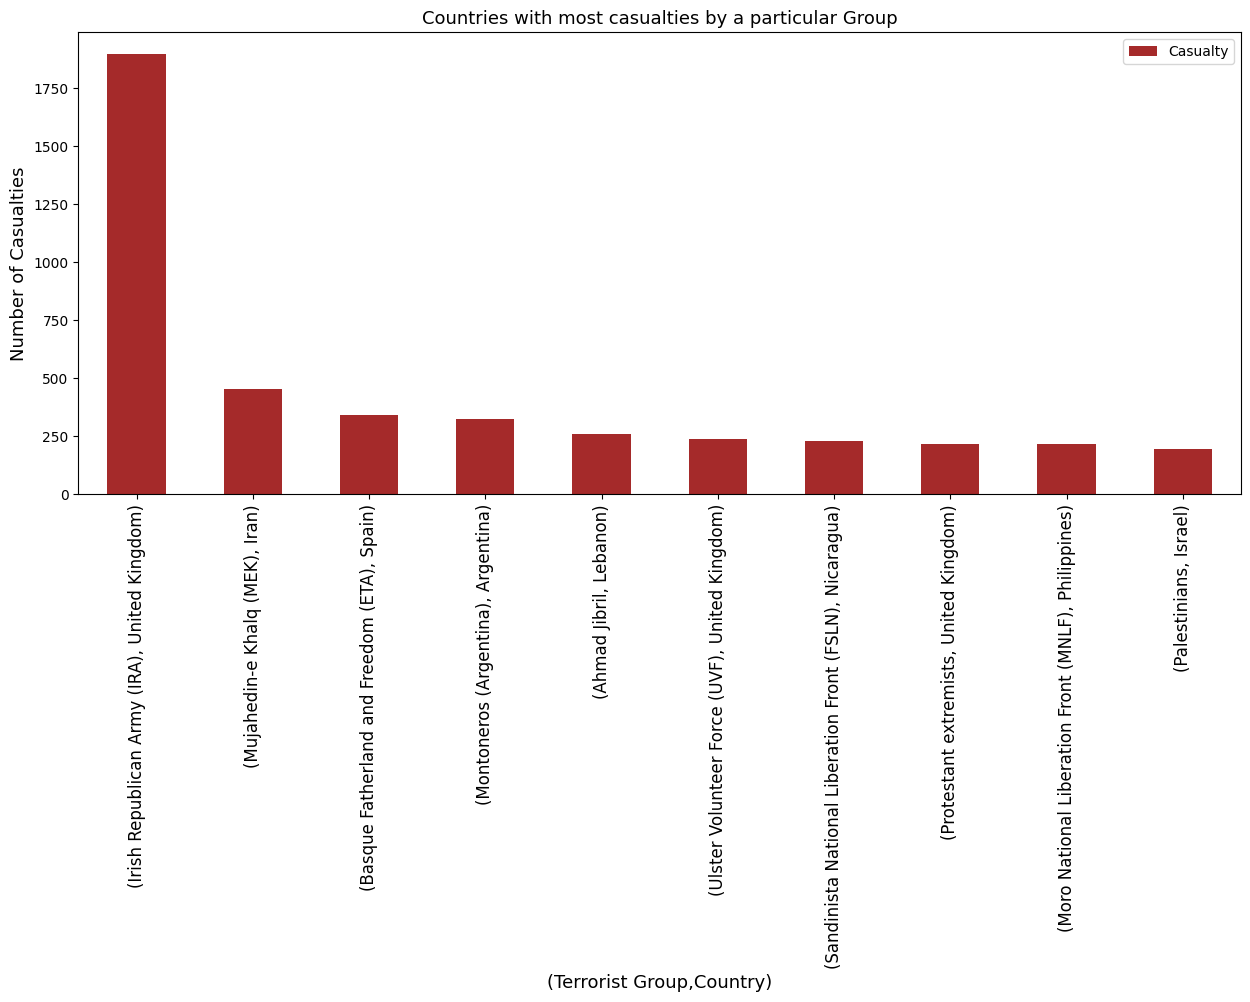

In [ ]:
GCC.plot(kind="bar",color="Brown",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
#Sorting by Number of People Killed

In [ ]:
GCK=data[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
GCK


<ipython-input-104-9a52796adde0>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  GCK=data[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


,,Killed
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,888.0
Mujahedin-e Khalq (MEK),Iran,448.0
Ulster Volunteer Force (UVF),United Kingdom,238.0
Protestant extremists,United Kingdom,218.0
Montoneros (Argentina),Argentina,202.0
Sandinista National Liberation Front (FSLN),Nicaragua,141.0
Basque Fatherland and Freedom (ETA),Spain,132.0
Moro National Liberation Front (MNLF),Philippines,110.0
Ulster Freedom Fighters (UFF),United Kingdom,101.0


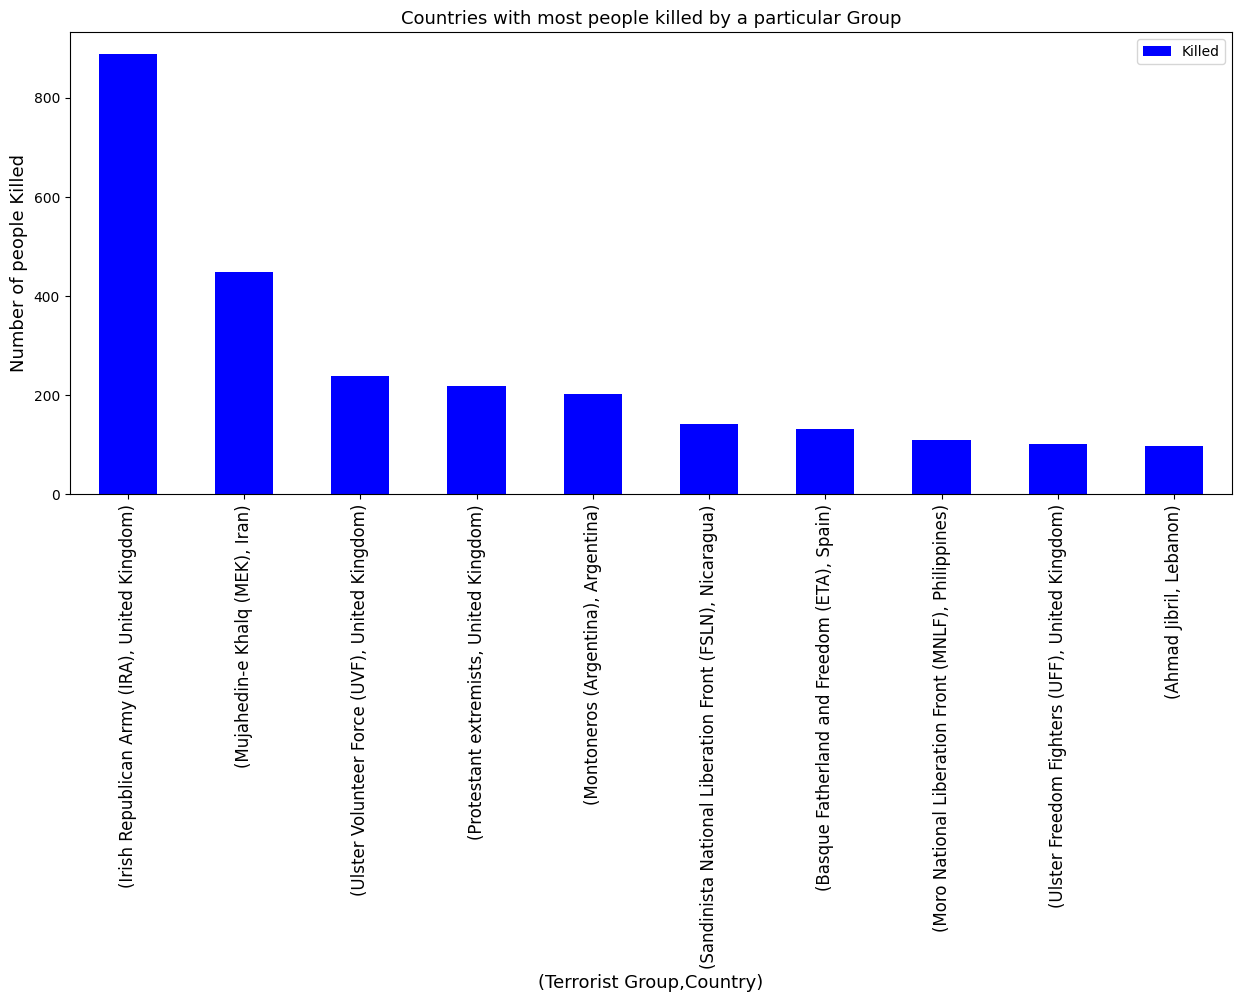

In [ ]:
GCK.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()


In [ ]:
#Sorting by Number of People Wounded

In [ ]:
GCW=data[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
GCW

<ipython-input-106-99cf5e5cdb9c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  GCW=data[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


,,Wounded
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,1009.0
Basque Fatherland and Freedom (ETA),Spain,210.0
Palestinians,Israel,182.0
Ahmad Jibril,Lebanon,160.0
Black Order,Italy,152.0
Democratic Front for the Liberation of Palestine (DFLP),Israel,151.0
Montoneros (Argentina),Argentina,122.0
Moro National Liberation Front (MNLF),Philippines,108.0
Maskini Liberation Front,Kenya,100.0


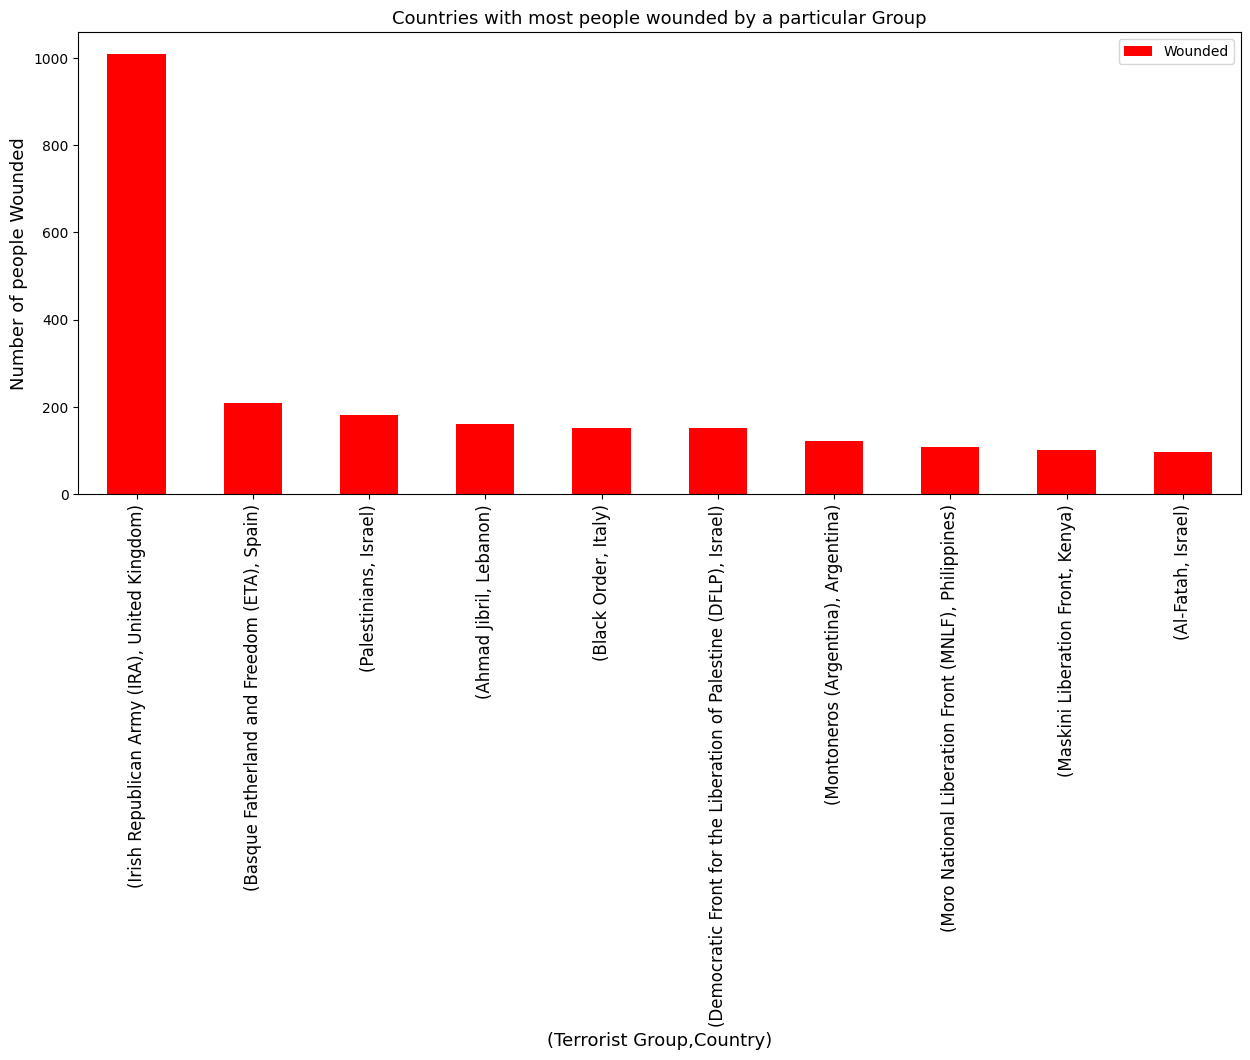

In [ ]:
GCW.plot(kind="bar",color="red",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

# Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

In [ ]:
#Total Casualties (Killed + Wounded) due to Terrorist Attacks

In [ ]:
casualty=data.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)


Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 10710.0


In [ ]:
#Killed due to terrorist attacks

In [ ]:
kill=data.loc[:,"Killed"].sum()
print("Number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 5114.0


In [ ]:
#Wounded due to Terrorist Attacks

In [ ]:
wound=data.loc[:,"Wounded"].sum()
print(" Number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

 Number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 5596.0
